1. Use https://www.nist.gov/node/1298471/emnist-dataset EMNIST ByClass datasets from scikit-learn
2. Use matlab file version
3. Use pandas to store and view data and perform descriptive statistics
4. Use pandas groupby to view data by classes, digits, letters
5. Display images of digits
6. Demonstrate pre-processing steps of scaling, gray-scaling, centering (sample, feature etc)
7. Use image augmentation to generate larger training dataset (flip, rotate, translate, shear, noise etc)
8. Splitting of train/test datasets
9. Logistic Regression modelling using scikit-learn
10. Model performance results - precision, recall, F1 Score, ROC Curve
11. Print and display confusion matrix
12. Write report to explain process and results

In [52]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
import tensorflow as tf
import keras
import sklearn
from sklearn.model_selection import train_test_split

In [4]:
from keras.utils import to_categorical

In [55]:
#load pre-processed training and testing datasets
#since the EMNIST dataset is already separately loaded from the mat file, 
#and since the validation data will be split using the ImageDataGenerator() class later on,
#train_test_split is not necessary to manually split the data
#unless for training a portion of the training dataset during optimization

In [65]:
#data augmentation' of training data
from keras.preprocessing.image import ImageDataGenerator

In [57]:
#reshape training and testing datasets to 4D tensors
X_train = X_train.reshape(-1, 28, 28, 1) #Xtrain
X_test = X_test.reshape(-1, 28, 28, 1) #Xtrain
# convert to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

(697932, 28, 28, 1)

In [58]:
'''keras CNN: logistic regression'''
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Activation
from keras.activations import relu
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Dropout

In [82]:
#specify hyperparams
batch_size = 64
epoch = 30
num_classes = 62 #since there are 62 classes in the By_Class dataset

In [60]:
'''CNN using keras'''
#try 2 layers 1st
def model_CNN():
    model = keras.Sequential()

    model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), padding = 'same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), padding = 'same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), padding = 'same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(MaxPooling2D((2,2), padding = 'same')) #halve the dimension
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), padding = 'same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), padding = 'same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), padding = 'same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(MaxPooling2D((2,2), padding = 'same')) #halve the dimension
    model.add(Dropout(0.2))

    model.add(Conv2D(128, kernel_size=(3,3), input_shape=(28,28,1), padding = 'same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D((2,2), padding = 'same')) #halve the dimension
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dropout(0.2))

    #add a batch normalization layer to normalize the data before activating

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    return model

In [61]:
model = model_CNN()

In [62]:
model.compile(loss = categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'])

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)       

In [78]:
#data augmentation

train_datagen = ImageDataGenerator(validation_split = 0.2, rotation_range=10, width_shift_range=0.1, 
                                   height_shift_range=0.1, zoom_range=0.1) 

train_generator = train_datagen.flow(x = X_train, y = Y_train, batch_size= 128, shuffle = True, subset = 'training') #Y_train__
validation_generator = train_datagen.flow(x = X_train, y = Y_train, batch_size= 128, shuffle = True, subset = 'validation')

In [79]:
from keras.callbacks import History

In [84]:
h = model.fit_generator(train_generator, steps_per_epoch= 8700, epochs=epoch,
        validation_data=validation_generator, validation_steps=2000)

Epoch 1/20
2500/2500 [==============================] - 580s 232ms/step - loss: 0.3603 - accuracy: 0.8656 - val_loss: 0.3805 - val_accuracy: 0.8572
Epoch 2/20
2500/2500 [==============================] - 580s 232ms/step - loss: 0.3614 - accuracy: 0.8655 - val_loss: 0.4169 - val_accuracy: 0.8616
Epoch 3/20
2500/2500 [==============================] - 579s 232ms/step - loss: 0.3593 - accuracy: 0.8658 - val_loss: 0.3840 - val_accuracy: 0.8634
Epoch 4/20
2500/2500 [==============================] - 580s 232ms/step - loss: 0.3593 - accuracy: 0.8658 - val_loss: 0.1899 - val_accuracy: 0.8622
Epoch 5/20
2500/2500 [==============================] - 580s 232ms/step - loss: 0.3580 - accuracy: 0.8663 - val_loss: 0.2636 - val_accuracy: 0.8535
Epoch 6/20
2500/2500 [==============================] - 580s 232ms/step - loss: 0.3557 - accuracy: 0.8672 - val_loss: 0.3241 - val_accuracy: 0.8612
Epoch 7/20
2500/2500 [==============================] - 580s 232ms/step - loss: 0.3573 - accuracy: 0.8669 - val_

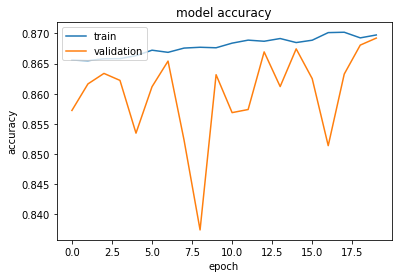

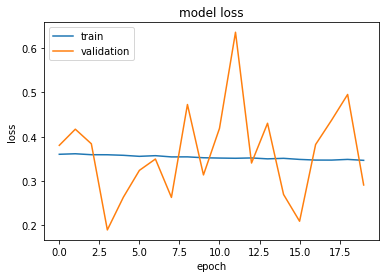

In [89]:
'''plot training accuracy vs validation accuracy'''
# list all data in history
#print(model.history.keys())
# summarize history for accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('C:/Users/yanhui/Documents/Jelah/Acronis/training_figures/_690k_20epochs_128batchsize_13layers_acc.jpeg')
plt.show()
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('C:/Users/yanhui/Documents/Jelah/Acronis/training_figures/690k_20epochs_128batchsize_13layers_loss.jpeg')
plt.show()



In [90]:
#save history for each training to csv
hist_df = pd.DataFrame(h.history) 
hist_csv_file = 'model.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [91]:
#save trained model
model.save("model")

In [13]:
#prediction and evaluation of prediction
test_predict = model.predict(X_test) #make a prediction for each testing output
test_eval = model.evaluate(X_test, Y_test, batch_size = 64)

In [31]:
#class determination of testing dataset 
y_classes = test_predict.argmax(axis=-1) #prediction classes
Y_test_classes = Y_test.argmax(axis=-1)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
#precision recall, F1 score
report = classification_report(Y_test_classes,y_classes, output_dict=True)
class_report = pd.DataFrame(report).transpose()
class_report.to_csv('classificationreport.csv, index = True)

In [33]:
#confusion matrix
confusion_mat = confusion_matrix(Y_test_classes,y_classes)
confusion_mat = pd.DataFrame(confusion_mat).transpose()
confusion_mat.to_csv('confusionmatrix.csv', index = True)
